# Logistic Regression with a synthetic dataset

The notebook aims to study and implement the logistic regression classification model with one variable and two classes. A synthetic dataset will be used to explain some details.


## Acknowledgments

- Used dataset: synthetic



## Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Create data

In [3]:
# Create a pandas dataframe
data = [[20.8, 0],
        [22.4, 0],
        [25.7, 0],
        [28.4, 1],
        [28.9, 0],
        [30.8, 1],
        [29.8, 0],
        [31.6, 0],
        [34.9, 1],
        [33.6, 1],
        [37.2, 1]]
df   = pd.DataFrame(data, columns=['BMI', 'Disease'])


## Undertanding the dataset

Get a general 'feel' of the dataset

In [4]:
df


,BMI,Disease
0,20.8,0
1,22.4,0
2,25.7,0
3,28.4,1
4,28.9,0
5,30.8,1
6,29.8,0
7,31.6,0
8,34.9,1
9,33.6,1


In [5]:
# Number of predictors/variables/features and obsertations in the dataset
Nr, Nc = df.shape
print("Number of observations (rows)  = {0:0d}".format(Nr))
print("Number of variables(columns)   = {0:0d}".format(Nc))


Number of observations (rows)  = 11
Number of variables(columns)   = 2


#### Characteristics of the dataset


1. The dataset description
    - Two observations/measurements/recordings of the characteristics/attributes/variables of an object/aminal/whatever
    - Variables: BMI and has diabetes
    - Total numer of observations: n=10


2. Description of the predictors/variables/features/attributes (independant variable)
    - BMI


3. Description of the response (dependant variable)
    - Disease


Note:
- This is a sythetic dataset created specially to introduce the basic conceps through simple explanations and calculations

In [11]:
# Summary statistics for the quantitative independent variables
df.BMI.describe()


count    11.000000
mean     29.463636
std       5.035330
min      20.800000
25%      27.050000
50%      29.800000
75%      32.600000
max      37.200000
Name: BMI, dtype: float64

In [12]:
# Summary statistics for the cualitative dependent variables

# Categories
print( df['Disease'].unique() )

# Count for each category
print( df['Disease'].value_counts() )

# Proportion of data for each category
N0s      = len(df[df['Disease']==0]) # Nzeros  = Ntotal - Nones
N1s      = len(df[df['Disease']==1]) # df.Disease.sum()
Ntotal   = N0s + N1s                 # df.Disease.shape[0]

pct_N0s  = N0s/Ntotal
pct_N1s  = N1s/Ntotal
print("Proportion of 0's is {0:0.0f}%".format(pct_N0s*100))
print("Proportion of 1's is {0:0.0f}%".format(pct_N1s*100))


[0 1]
0    6
1    5
Name: Disease, dtype: int64
Proportion of 0's is 55%
Proportion of 1's is 45%


Our classes are imbalanced, and the ratio of 0 to 1 instances is 55:45

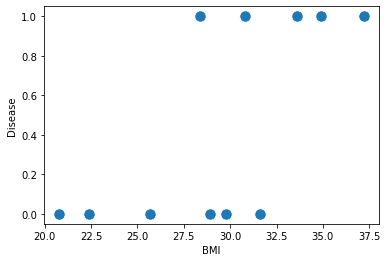

In [13]:
# Scatter plot of the data
sns.scatterplot(data=df, x="BMI", y="Disease", s=128)
plt.show()


The scatter plot shows the relationship between **BMI** $x$ and **Disease** $y$ 

Note how the dependent variable **disease** is categorical where a value of 0 implies that the subject *does not have the disease* while  value of 1 indicates the subject *has the disease*

Note that a straigh line is not the best alternative to explain the data. 

Notice that:
- Predictors with a high BMI value have high probability of belonging to a response $y$ of 1 or *has the disease*
- Predictors with a low BMI value have low probability of belonging to a response $y$ of 1 or *has the disease* (or a high probability of belonging to a response $y$ of 1 or *has the disease*)
- Predictors with a BMI value somewhere in the middle have probability around 0.5 of belonging to a response $y$ of 1 or *has the disease*

So, instead of defining a model to predict the exact value of $y$ (0 and 1), we can somehow compute probability.

## Problem description

Given a feature vector we want to decide which class or category it belongs to

- Feture vector: $x = [x_1,x_2,...,x_p]^{T}$, $X \in \Re^{p}$

- Set of labels/classes: $\{c_1,c_2,...,c_K\}$

This is a classifiction problem which:

- Learns a function (based on the examples) that maps and input to an output

- Requires a dataset of examples with observations and the labels of each observations

- Once the classifier is learned (the function): we apply the function of a new unknown observation ($x$) to decide which class it belongs to

## Introduction to the logistic regression classification model

Logistic Regression is a ML classification algorithm used to predict the probability that an observation $x$ belongs to each of the categories of a qualitative response variable $y$.

Let's consider that the response variable $y$ falls into one of two categories (Yes or No; 1 or 0; *has the disease* or *does not have the disease*).

Logistic regression models the probability that $y$ belongs to a particular category (the probability of Yes, 1, *has the disease*), that is:

$$ Pr(y = Yes|x) $$

or 

$$ Pr(y = 1|x) $$

Or abbreviated:

$$p(x)$$

Obviously this probability ranges between 0 and 1

Now, for any given value of $x$, a prediction can be made for $y$. For example:
- One might predict $y=1$ for any input data $x$ for which $p(x) > 0.5$
- While we can predict $y=0$ for any input data $x$ for which $p(x) \leq 0.5$

Importantly, if we want to be more conservative in classifying, then we may choose to use a lower threshold, such as
- One might predict $y=1$ for any input data $x$ for which $p(x) > 0.3$
- While we can predict $y=0$ otherwise


How should we model the relationship between $P(x)$ and x?

The answer is by using a function that gives outputs between 0 and 1 for all values of $x$ such as the sigmoid funtion:

$$ p(x) = \frac{ e^{x} }{ e^{x}+1 } = \frac{1}{ 1 + e^{-x} } $$


In [14]:
# Define a python funtion for the sigmoid funtion
def SigmoidFunction(x):
    den = 1 + np.exp(-x)
    return 1/den


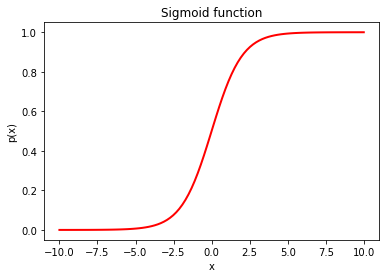

In [15]:
# Calculate x and y for the sigmoid funtion
xl   = np.linspace(-10,10,100)
yl   = SigmoidFunction(xl)

# Plot the sigmoid funtion
plt.plot(xl, yl, '-r' , label='Sigmoid function'  , linewidth=2)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Sigmoid function')
plt.show()


Note how the value of the sigmoid function always lies between 0 and 1 for all valus of x.

Because we want to accomodate the center and the growth rate/steepness according to our data, in logistic regression we use the **logistic function**:

$$ p(x) = \frac{ e^{\beta_0+\beta_1 x} }{ e^{\beta_0+\beta_1 x} +1 } = \frac{1}{ 1 + e^{-(\beta_0+\beta_1 x)} } $$

where $\beta_0$ and $\beta_1$ are the model coefficients that need to be estimated from the data.

Note how we have a linear model in the exponent.

In [16]:
# Define logistic function
def LogisticFunction2(x,b0,b1):
    lin = b0 + b1*x    
    num = np.exp(lin)
    den = np.exp(lin) + 1
    return num/den
    #den = 1 + np.exp(-lin)
    #return 1/den

# Define x to compute the logistic function that migh explain the data
xl  = np.linspace(20,40,100)


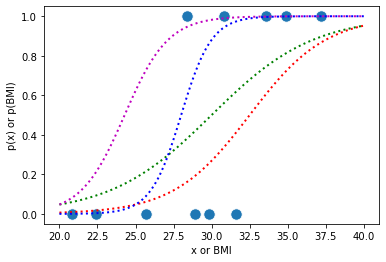

In [118]:
# Three different logistic functions
#     LogisticFunction2(x , b0 ,b1)
z1  = LogisticFunction2(xl,-13,0.4)
z2  = LogisticFunction2(xl,- 9,0.3)
z3  = LogisticFunction2(xl,-28,1.0)
z4  = LogisticFunction2(xl,-17,0.7)

# Scatter plot of the data and a logistic function
sns.scatterplot(data=df, x="BMI", y="Disease", s=128)
plt.plot(xl, z1, ':r' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z2, ':g' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z3, ':b' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z4, ':m' , label='Logistic function'  , linewidth=2)
plt.xlabel("x or BMI")
plt.ylabel("p(x) or p(BMI)")
plt.show()


The logistic function produces a S-shaped curve which is modified according to the coefficient values.

Irrespective of the plotted $p(x)$, check how we can obtain the probability of **Disease** given a value of **BMI**:
- If body mass index is high, there is a high probability of having the disease (i.e., $y$ is close to 1)
- If body mass index is low, there is a low probability of having the disease (i.e., $y$ is close to 0)
- If body mass index is around 30, there is around 50% chance of having the disease

Note that the center of the function (i.e., the value of $x$ for which $p(x)=0.5$) and the growth rate/steepness are important to correctly fit $p(x)$ to the data

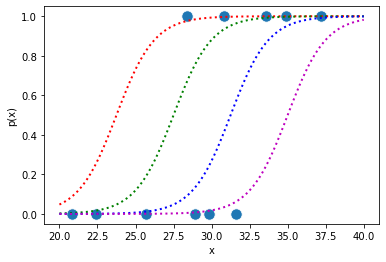

In [119]:
# Let's explore the effect of b0 for fixed b1
#     LogisticFunction2(x , b0 ,b1)
z1  = LogisticFunction2(xl,-19,0.8)
z2  = LogisticFunction2(xl,-22,0.8)
z3  = LogisticFunction2(xl,-25,0.8)
z4  = LogisticFunction2(xl,-28,0.8)

# Scatter plot of the data and a logistic function
sns.scatterplot(data=df, x="BMI", y="Disease", s=128)
plt.plot(xl, z1, ':r' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z2, ':g' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z3, ':b' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z4, ':m' , label='Logistic function'  , linewidth=2)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

# Note how the change in the $\beta_0$ value affects the shift


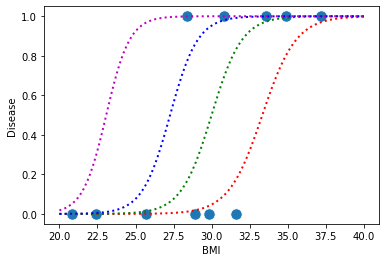

In [120]:
# Let's explore the effect of b1 for a fixed b0
#     LogisticFunction2(x , b0 ,b1)
z1  = LogisticFunction2(xl,-30,0.9)
z2  = LogisticFunction2(xl,-30,1.0)
z3  = LogisticFunction2(xl,-30,1.1)
z4  = LogisticFunction2(xl,-30,1.3)

# Scatter plot of the data and a logistic function
sns.scatterplot(data=df, x="BMI", y="Disease", s=128)
plt.plot(xl, z1, ':r' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z2, ':g' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z3, ':b' , label='Logistic function'  , linewidth=2)
plt.plot(xl, z4, ':m' , label='Logistic function'  , linewidth=2)
plt.show()

# Note how the change in the $\beta_1$ value affects both the shift and the growth rate/steepness


## Description of the logistic regression classification model

With the logistic regresion function we model the probability of each class given a feature vector or observation, that is:

$$ Pr(Y = k|X = x), \, \, for \, \, k=1,2,...,K $$ 

where $K$ is the numer of classes and $x = [x_1,x_2,x_3,...,x_p]$ is the feature vector or observation.

We model the conditional distribution of the response $Y$ (the class), given the predictor $X$ (i.e., the features/variables)

For two classes and $p$ predictors, the probability of one class given is:

$$ p(y=1|x) = p(x) = \frac{ e^{\beta_0+\beta_1 x_1+...+\beta_p x_p} }{ e^{\beta_0+\beta_1 x_1+...+\beta_p x_p} +1 }$$

while the probability of the other class is simply:

$$ p(y=0|x) = 1 - p(y=1|x) $$

Important concepts:

- Odds
- Log odds or logit


The question is now how to estimate the coefficients (i.e., $\beta_i \, \, for \, \, i=0,1,2,...,p$ ) based on data?

Unlike the case of linear regression, logistic regression does not have the concept of RSS, thus we cannot use least squares.

Instead, we use **maximum likelihood estimation**.

Our task is to obtain coefficient estimates ($\hat{\beta}_i \, \, for \, \, i=0,1,2,...,p$) that maximize the likelihood function. 

We will not cover such technical details here.


## Estimating the coefficients of the logistic regression model using sklearn

Estimating the coefficients using sklearn

In [17]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Fit the model
clfmodel   = LogisticRegression(C=1e5)
clfmodel.fit(df[["BMI"]], df[["Disease"]])


C:\Users\L01046417\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=100000.0)

In [18]:
# Get model intercept
b0 = clfmodel.intercept_
print("The intercep b0 is", b0)


The intercep b0 is [-16.91254591]


In [19]:
# Get model coefficient (slope) 
b1 = clfmodel.coef_[0]
print("The slope b1 is", b1)


The slope b1 is [0.55572224]


## Understanding the model

The estimated coefficients $\hat{\beta_0}$ and $\hat{\beta_1}$ were calculated from the data.

The final logistic regression model is:

$$ p(x) = \frac{ e^{\beta_0+\beta_1 x} }{ e^{\beta_0+\beta_1 x} +1 }$$

$$ p(x) = \frac{ e^{-16.91+0.56 x} }{ e^{-16.91+0.56 x} +1 }$$


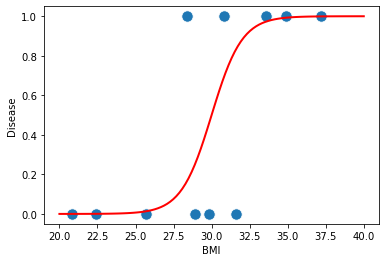

In [20]:
# Calculate x and y for the logistic funtion learned from the data
xl  = np.linspace(20,40,100)
zl  = LogisticFunction2(xl,b0[0],b1[0])

# Scatter plot of the data and a logistic function
sns.scatterplot(data=df, x="BMI", y="Disease", s=128)
plt.plot(xl, yl, '-r' , label='Logistic function'  , linewidth=2)
plt.show()


This the $p(x)$ that best fits the data.

## Make predictions

Make predictions using a new $x$

In [21]:
# Define one input x and compute the output using regmodel
xnew = [25]
ynew = clfmodel.predict([xnew])
ynew


array([0], dtype=int64)

In [22]:
# Define several inputs x and compute the output using regmodel
xn = np.array([[16.3, 27.2, 41.3]]).T
yn = clfmodel.predict(xn)
yn


array([0, 0, 1], dtype=int64)

Define a function to make predictions

In [23]:
# Function to predict
def PredictDisease(x):
    lin = -16.91254591 + 0.55572224*x    
    num = np.exp(lin)
    den = np.exp(lin) + 1
    px  = num/den # probabilidad de pertenecer a la clase 1
    #px_clase0 = px -1  # probabilidad de pertenecer a la clase 0
    
    if px>=0.7:
        y=1
    else:
        y=0            
    
    return y


In [24]:
# Predict a value
Xnew = 28
Ynew = PredictDisease(Xnew)
Ynew


0

# Final remarks


- Logistic regresion is a classification model ¡

- Logistic regresion compute the probability of each class given a new set of observation $Pr(Y = k|X = x) \, \, for \, \, k=1,2,...,K$ using the logistic function

- In statistical jargon, we model the conditional distribution of the response $Y$, given the predictor(s) $X$

# Activity 1: work with the iris dataset


1. Using the **iris** dataset and build a linear model to predict:
    - The type of flower (two classes) based on two of the provided features (two predictors)
    - The type of flower (two classes) based on the four provided features (four predictors)

